In [745]:

library(ggplot2)
library(lubridate)
library(reshape2)
library(dplyr)
library(stringr)
library(usmap)
library(maps)

ultility<-read.table(file = "~/Documents/SP2021/CS424/annual_generation_state.csv", sep = ",", stringsAsFactors = FALSE,header = TRUE)

In [700]:

names(ultility)[names(ultility) == "GENERATION..Megawatthours."] <- "Wat"

names(ultility)[names(ultility) == "TYPE.OF.PRODUCER"] <- "type" 

names(ultility)[names(ultility) == "ENERGY.SOURCE"] <- "source"
names(ultility)[names(ultility) == "YEAR"] <- "year"
names(ultility)[names(ultility) == "STATE"] <- "state"








ultility$Wat<-gsub(",","",ultility$Wat,fixed=TRUE)
ultility$Wat <-as.numeric(ultility$Wat)

ultility<-subset(ultility, state != "  " & Wat > -1 & source!="Other" & source!="Other Gases" & source != "Other Biomass" & source!="Pumped Storage")

ultility$state <-toupper(ultility$state)
unique(ultility$state)

ultility$source[ultility$source == "Hydroelectric Conventional"]  <- "Hydro"
ultility$source[ultility$source == "Solar Thermal and Photovoltaic"] <- "Solar"
ultility$source[ultility$source == "Natural Gas"] <- "Gas"
ultility$source[ultility$source == "Wood and Wood Derived Fuels"] <- "Wood"




[1] "AK"       "AL"       "AR"       "AZ"       "CA"       "CO"      
 [7] "CT"       "DC"       "DE"       "FL"       "GA"       "HI"      
[13] "IA"       "ID"       "IL"       "IN"       "KS"       "KY"      
[19] "LA"       "MA"       "MD"       "ME"       "MI"       "MN"      
[25] "MO"       "MS"       "MT"       "NC"       "ND"       "NE"      
[31] "NH"       "NJ"       "NM"       "NV"       "NY"       "OH"      
[37] "OK"       "OR"       "PA"       "RI"       "SC"       "SD"      
[43] "TN"       "TX"       "US-TOTAL" "UT"       "VA"       "VT"      
[49] "WA"       "WI"       "WV"       "WY"

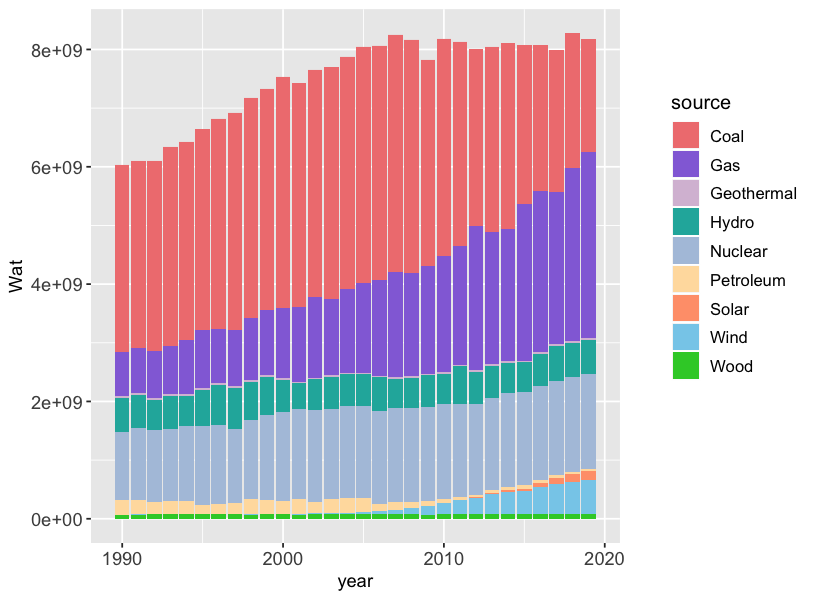

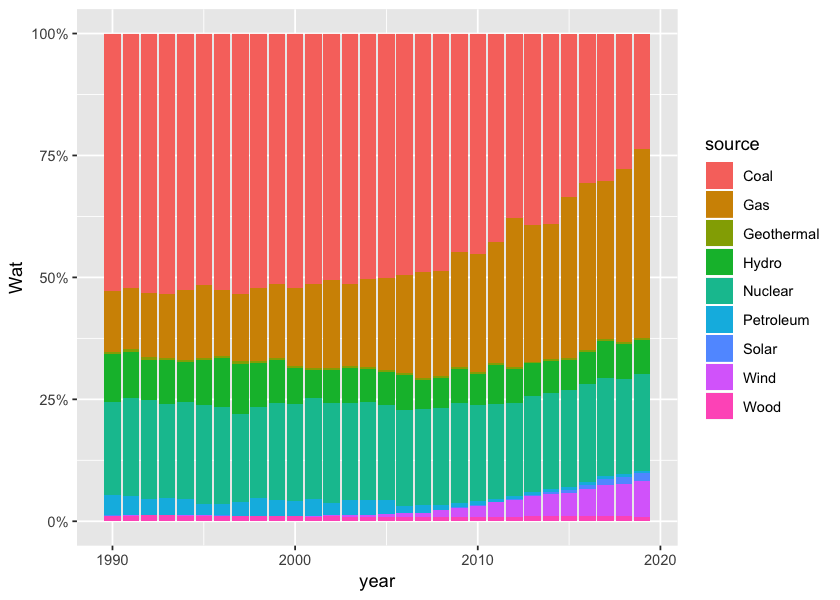

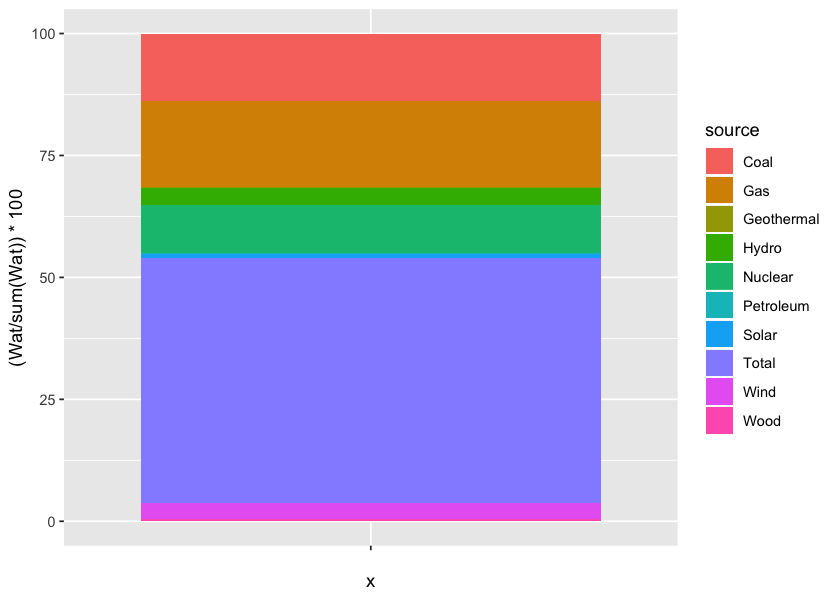

In [730]:
options(repr.plot.width=7, repr.plot.height=5)
map_colors= c("Coal"= "#F08080","Gas" ="#9370DB","Geothermal"="#D8BFD8","Hydro"="#20B2AA","Nuclear"="#B0C4DE","Solar"="#FFA07A","Wind"="#87CEEB","Petroleum"="#FFDEAD","Wood"="#32CD32" )

ultility_us <-subset(ultility,state =="US-TOTAL" & source != "Total")
ggplot(ultility_us,aes(x=year,y=Wat,fill =source)) + geom_bar(position="stack",stat="identity",na.rm=TRUE) +scale_fill_manual(values =map_colors) +theme(legend.title =element_text(size= 12), legend.text =element_text(size =10) , axis.text =element_text(size=11),legend.justification = c("right", "top"), legend.margin = margin(50, 20, 20, 20))+ labs(x="year",cex.lab=3)
ggplot(ultility_us,aes(x=year,y=Wat ,fill =source)) + geom_bar(position="fill",stat="identity",na.rm=TRUE) +scale_y_continuous(labels = scales::percent) 

y2018 <- subset(ultility,year==2018 & state =="US-TOTAL")
ggplot(data = y2018,aes(x="",y=(Wat/sum(Wat))*100,fill=source ))+ geom_bar(position="stack",stat="identity",na.rm=TRUE)



In [734]:
#y2008 <- subset(ultility,year==2008 & state =="US-TOTAL")
#y2009 <- subset(ultility,year==2009 & state =="US-TOTAL")
#y2011 <- subset(ultility,year==2011 & state =="US-TOTAL")

#ce_f <- ggplot(ultility_us ,aes(x=year,y=Wat,fill=year)) + geom_bar(stat ="identity")#

ce <-  group_by(ultility_us,year) %>% mutate(percent_weight = Wat / sum(Wat)) %>% group_by(year,source) %>%  summarise_at(vars(percent_weight),list(percent=sum))
ce_t <-   group_by(ultility_us,year,source) %>%  summarise_at(vars(Wat),list(my_sum=sum))

unique(ce$year)
a<-unique(ultility$source)

so <-subset(ce_t, source == "Solar")
names(ce)
names(ce_t)
#ggplot(so,aes(x=year,y= my_sum,colour =source ))+ geom_line()
 
#ce$percent <- round(ce$percent*100,2)
#as.data.frame(dcast(ce,year~source))
#dcast(ce_t,year~source)



#coal <- subset(ultility_us,source =="Hydro" & year == 1993 )
#table(ce[,c(1,2)])
#as.data.frame(ce[,c(1,2)])


#ggplot(data = y2008,aes(x="",y=Wat/sum(Wat),fill=source ))+ geom_bar(position="stack",stat="identity",na.rm=TRUE)
#ggplot(data = y2009,aes(x="",y=Wat/sum(Wat),fill=source ))+ geom_bar(position="stack",stat="identity",na.rm=TRUE)
#ggplot(data = y2011,aes(x="",y=Wat/sum(Wat),fill=source ))+ geom_bar(position="stack",stat="identity",na.rm=TRUE)



[1] 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004
[16] 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019

[1] "year"    "source"  "percent"

[1] "year"   "source" "my_sum"

[1] 1

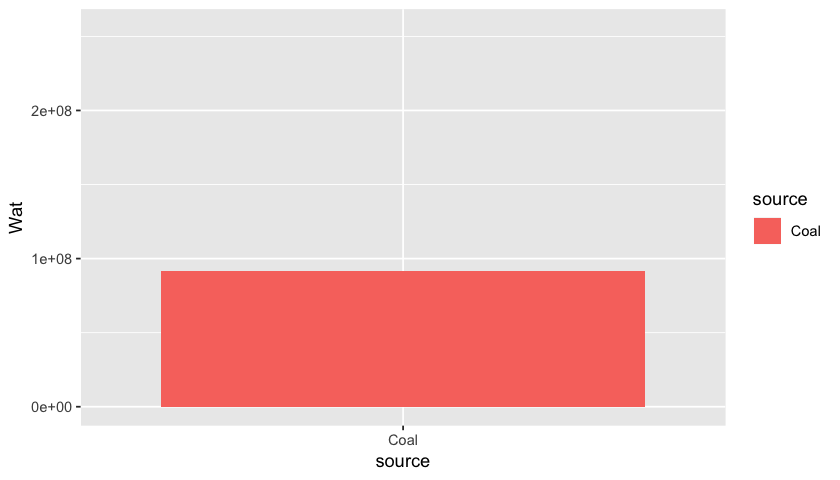

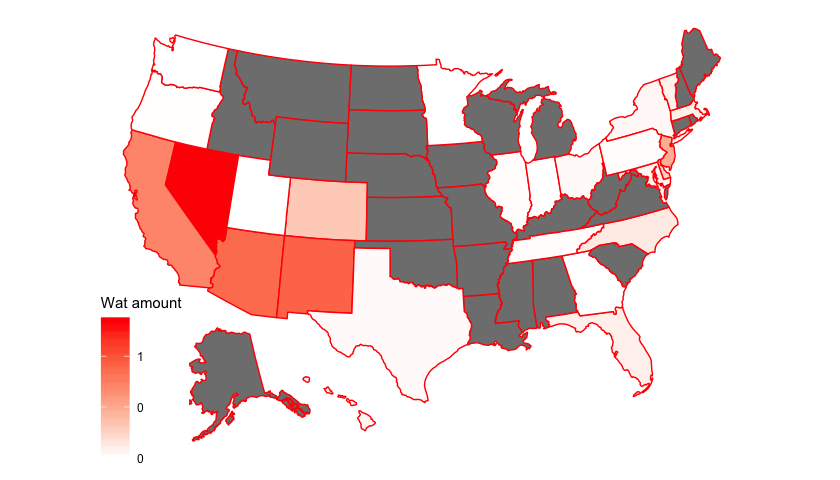

In [739]:
options(repr.plot.width=7, repr.plot.height=4)
a<-unique(ultility$source)

ulti_inv  <- subset(ultility,source !="Total")
ultir_state  <- subset(ulti_inv , state =="IL"& year == 2006& source == "Coal" )

ulti_ins <- subset(ultility,state !="US-TOTAL" &source !="Total" )

#ultir <- subset(ultir_state, source == "Coal")
#ggplot(ultir) + geom_bar(stat="identity",position="dodge",aes(x=source,y=Wat,fill=source)) 
max_wat <- max(ulti_ins$Wat)

ggplot(ultir_state) + geom_bar(aes(x=source,y=Wat,fill=source),stat="identity",position="dodge") + ylim(0,max_wat)

1

#state_name <- dplyr::select(state_name,region)


state_names <-tolower(rownames(state.x77))
ulti_a <- subset(ulti_ins, source == "Solar" & year==2012)
ulti<- ulti_a %>% group_by(state) %>% summarise_at(vars(Wat),list(my_sum=sum))


ulti_percent<-ulti_ins %>% group_by(year,state) %>% mutate(percent_source = Wat/sum(Wat)) %>% group_by(year,state,source) %>% summarise_at(vars(percent_source),list(my_sum=sum))
ulti_percent$my_sum <-ulti_percent$my_sum*100
#ulti_per<-subset(ulti_percent,source == "Coal" & year==1997) 
ulti_per <-subset(ulti_percent,source == "Solar" & year==2012)



for( state in unique(ulti_ins$state)){
    if(!(state %in% ulti$state)){
       sub_ulti <- data.frame(state,0)
       names(sub_ulti) <- c("state","my_sum")
       
       ulti<-rbind(ulti,sub_ulti)
       
    }
}

#ulti







#plot_usmap(data =ulti,values="my_sum",include= unique(ulti_ins$state),color = "red") + 
 # scale_fill_continuous(low = "white", high = "red", name = "Wat amount", label = scales::comma) 

plot_usmap(data =ulti_per,values="my_sum",include= ulti$state,color = "red") + 
 scale_fill_continuous(low = "white", high = "red", name = "Wat amount", label = scales::comma) 







#ulti_percent <- ulti %>% group_by(state) >



#ulti <- subset(ulti_ins, source == "Coal" & year==1991 & state =="TN")
#ulti_states <- subset(ulti_ins, year==1991 & state =="TN") 
#sum(ulti$Wat)/sum(ulti_states$Wat)

#r<- unique(state_name$region)
#r <- c(r,c("alaska","hawaii"))
#rt <- as.factor(rt)


In [696]:

state_key <- c(state.abb,c("US-TOTAL","DC"))
state_name <- c(state.name,c("US-TOTAL","Washington DC"))
state_name
t<-setNames(state_key,state_name)["Washington DC"] 
ulti_a <- subset(ulti_ins, source == t & year==2018)
ulti_a <-
subset(ulti_a, state == t & year ==2018) 




[1] "Alabama"        "Alaska"         "Arizona"        "Arkansas"      
 [5] "California"     "Colorado"       "Connecticut"    "Delaware"      
 [9] "Florida"        "Georgia"        "Hawaii"         "Idaho"         
[13] "Illinois"       "Indiana"        "Iowa"           "Kansas"        
[17] "Kentucky"       "Louisiana"      "Maine"          "Maryland"      
[21] "Massachusetts"  "Michigan"       "Minnesota"      "Mississippi"   
[25] "Missouri"       "Montana"        "Nebraska"       "Nevada"        
[29] "New Hampshire"  "New Jersey"     "New Mexico"     "New York"      
[33] "North Carolina" "North Dakota"   "Ohio"           "Oklahoma"      
[37] "Oregon"         "Pennsylvania"   "Rhode Island"   "South Carolina"
[41] "South Dakota"   "Tennessee"      "Texas"          "Utah"          
[45] "Vermont"        "Virginia"       "Washington"     "West Virginia" 
[49] "Wisconsin"      "Wyoming"        "US-TOTAL"       "Washington DC"

year,state,type,source,Wat


In [617]:
inv_y<-unique(ce$year)
lengths(inv_y)
a  <- c()
for(y in inv_y){

  ct <-subset(ce,year == y)
  a<-unique(ct$source) 
  if( !( "Coal" %in% a & "Hydro" %in% a & "Gas" %in% a & "Petroleum" %in% a &  "Wind" %in% a &  "Wood" %in% a &  "Nuclear" %in% a & "Geothermal" %in% a & "Solar" %in% a) ){
     print("false con")
  } 
     
}
count <- 0
for( sub_state in unique(state_names)){
    count <- count +1
}
print(count)
count <- 0
for( sub_state in unique(state.name)){
    count <- count +1
}
print(count)


[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

[1] 50
[1] 50


xi,yi,ui
1,2,a
1,3,b
1,4,a
1,2,b
2,1,b
2,2,b
2,1,a
2,3,a
3,2,a
3,1,b


[1] "------"


Using name as value column: use value.var to override.


[1] 1 1 1 1 2 2 2 2 3 3 3 3

[1] 1 2 3

[1] 12


[1] 0.5454545

xi,ui,name
1,a,0.5454545
1,b,0.4545455
2,a,0.5714286
2,b,0.4285714
3,a,0.6666667
3,b,0.3333333


[1] a b
Levels: a b

          1         2
1 0.5454545 0.4285714
2 0.4545455 0.6666667
3 0.5714286 0.3333333

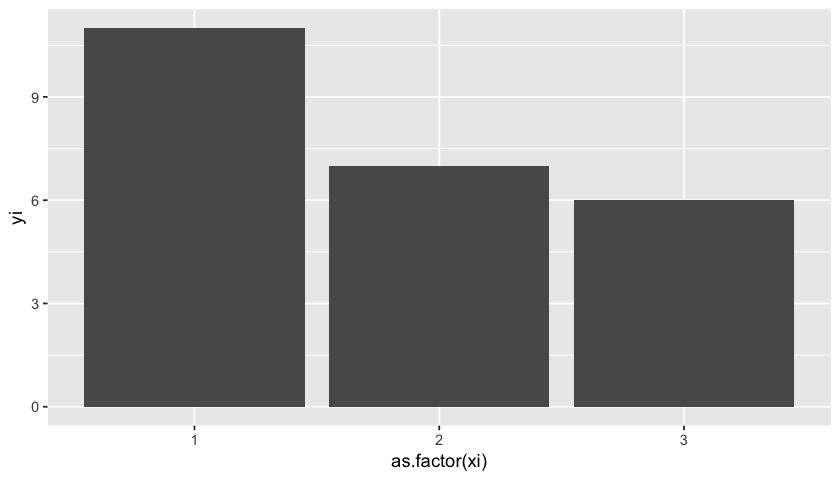

In [752]:
cr <- data.frame(xi=c(1,1,1,1,2,2,2,2,3,3,3,3),yi=c(2,3,4,2,1,2,1,3,2,1,2,1),ui =c("a","b","a","b","b","b","a","a","a","b","a","b"))
cr_p <- group_by(cr,xi) %>% mutate(percent_weight = yi / sum(yi) ) %>% group_by(xi,ui) %>%  summarise_at(vars(percent_weight),list(name=sum))
#aggregate(cr$percent_weight, by=list(my_ui=cr$ui),FUN=sum)
#cr[,1]


rbind(cr,data.frame(xi=4,yi=1,ui="a"))

ggplot(cr,aes(x=as.factor(xi),y=yi)) + geom_bar(stat="identity")

print("------")

crt <- dcast( cr_p, xi~ui )
cr[,1]
count =0 
cr_y <- c()
for(i in 1:nrow(cr)){
    if(!(cr[i,]$xi %in% cr_y)){
        cr_y<-c(cr_y,cr[i,]$xi)
    }
    count <- count+ 1
}
cr_y
print(count)

t <-rep(1:3,times =3) 
cr_p[1,]$name



#cr_c <- data.frame(xi =c(1,2,3,4), yi= c(1,2,3,4))

#ggplot(cr_c,aes(xi,y=ifelse(yi==1|yi==2,yi+10,yi))) + geom_line()
#ggplot(cr_c,aes(x= xi,yi=valu)) + geom_line()

cr_p
cr_v<-subset(cr_p,xi==1)
cr_v <-cr_v$ui
cr_v

trail <- matrix(cr_p$name ,nrow =3) 
colnames(trail) <- c("1","2")
rownames(trail)  <- c("1","2","3")
as.table(trail)



In [751]:
cr[,"yi"]

[1] 2 3 4 2 1 2 1 3 2 1 2 1

In [179]:
vy <- c(1:12,2:22)
cr_c <- cr 

rep(1:5, each=4)
cr_c$id <-sample(1:2, nrow(cr_c),replace=TRUE)
cr_c$id <- (cr_c$id)

ha <- function(i){
    if(i==1){
        return(11)
    }
    else{
        return(12)
    }
}

cr_c <- data.frame(xi =c(1,2,3,4), yi= c(1,2,3,4))
ggplot(cr_c,aes(xi,y=) + geom_line(
    
valu <- c(1:11,2:12)
ggplot(cr_c,aes(x= xi,yi=valu)) + geom_line()
    
    
    
    



[1] 1 1 1 1 2 2 2 2 3 3 3 3 4 4 4 4 5 5 5 5

ERROR: Error in `$<-.data.frame`(`*tmp*`, id, value = c(1L, 2L, 3L, 4L, 5L, 6L, : replacement has 33 rows, data has 12
